<a href="https://colab.research.google.com/github/GuillermoAlmandoz/IEBS-Master-Data-Science/blob/main/Proyecto_M2_housedata_multiple_linear_regression_Git2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/GuillermoAlmandoz/IEBS-Master-Data-Science/main/notebook_banner.png" width="1024" style="float:center">
<div style="margin-top:10px; display:flex; align-items:center;">
    <div style="float:left; margin-right:10px;vertical-align:middle">
        <a href="https://www.linkedin.com/in/Guillermo-Almandoz-Rios/" targer="_blank">
            <img src="https://raw.githubusercontent.com/GuillermoAlmandoz/IEBS-Master-Data-Science/main/lkin-logo.png"/>
        </a>
    </div>
    <div> 
        Guillermo Almándoz (23/01/2023)
    </div>
 </div>

# Regresión lineal múltiple del dataset `housedata` (Kaggle)

En el proyecto implementaremos un modelo de regresión para prececir los los precios de la vivienda.

Para el proyecto, utilizaremos el siguiente dataset público que encontramos en Kaggle. https://www.kaggle.com/shree1992/housedata

En los modelos de regresión hay que tomar algunas decisiones, como:

- ¿con cuántas variables entrenar el modelo?
- ¿debemos escalar los datos o no?

La segunda pregunta la vamos a responder de forma empírica (mediante prueba y error).

Para responder a la primera pregunta vamos realizar un análisis del dataset con el objetivo de formular distintas hipótesis de entrenamiento.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Configurar estilos de seaborn
sns.set()

## Recolección de los datos

In [ ]:
# Recolectamos los datos desde el dataset de la plataforma Kaggle shree1992/housedata
# Importamos fichero local previamente descargado el ficero
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


## Importación del dataset

In [ ]:
housedata = pd.read_csv("data.csv")

## Exploración del dataset

In [ ]:
# Tamaño del dataset
housedata.shape

(4600, 18)

In [ ]:
# Columnas y tipos de datos
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**Variables numéricas**

- `price`: precio de la vivienda
- `bedrooms`: número de habitaciones de la vivienda
- `bathrooms`: número de baños de la vivienda
- `sqft_living`: superficie en pies cuadrados de vivienda
- `sqft_lot`: precio pies cuadrados lote de la vivienda
- `floors`: pisos de la vivienda
- `waterfront`: frente al mar de la vivienda
- `view`: vista de la vivienda
- `condition`: condición/ estado de la vivienda
- `sqft_basement`: superficie de sotano en pies cuadrados
- `yr_built`: año construcción vivienda
- `yr_renovated`: año de restauración de vivienda
    
**Variables categóricas**

- `date`: fecha de analisis de precio de la vivienda
- `street`: Indica la calle de la vivienda
- `city`: ciudad de ubicación de la vivienda 
- `statezip`: código postal
- `country`: país

In [ ]:
# Mostrar estadísticas para las variables numéricas y categóricas
housedata.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,4600,70,2014-06-23 00:00:00,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,4600.0,NaN,NaN,NaN,551962.988473,563834.702547,0.0,322875.0,460943.461539,654962.5,26590000.0
bedrooms,4600.0,NaN,NaN,NaN,3.40087,0.908848,0.0,3.0,3.0,4.0,9.0
bathrooms,4600.0,NaN,NaN,NaN,2.160815,0.783781,0.0,1.75,2.25,2.5,8.0
sqft_living,4600.0,NaN,NaN,NaN,2139.346957,963.206916,370.0,1460.0,1980.0,2620.0,13540.0
sqft_lot,4600.0,NaN,NaN,NaN,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,NaN,NaN,NaN,1.512065,0.538288,1.0,1.0,1.5,2.0,3.5
waterfront,4600.0,NaN,NaN,NaN,0.007174,0.084404,0.0,0.0,0.0,0.0,1.0
view,4600.0,NaN,NaN,NaN,0.240652,0.778405,0.0,0.0,0.0,0.0,4.0
condition,4600.0,NaN,NaN,NaN,3.451739,0.67723,1.0,3.0,3.0,4.0,5.0


In [ ]:
price_min = int(housedata.price.min())
price_max = int(housedata.price.max())
print(f"El precio de la vivienda está entre los {price_min} y los {price_max}")
price_range = price_max - price_min
price_range_magnitude = math.floor(math.log(price_range, 10))
print(f"La diferencia de los costes de vivienda tiene un orden de magnitud de {price_range_magnitude},"
      f" de {price_min:.2f} a {price_max:.2f}")

sqft_living_median = int(housedata.sqft_living.median())
sqft_living_max = int(housedata.sqft_living.max())
print(f"El promedio de la superficie dela vivienda en sqft es de {sqft_living_median}, y el máximo de {sqft_living_max}")



El precio de la vivienda está entre los 0 y los 26590000
La diferencia de los costes de vivienda tiene un orden de magnitud de 7, de 0.00 a 26590000.00
El promedio de la superficie dela vivienda en sqft es de 1980, y el máximo de 13540


## Limpieza del dataset

In [ ]:
# Registros duplicados
shape_pre = housedata.shape
shape_post = housedata.drop_duplicates().shape
print("Tamaño del data set original:",shape_pre)
print("Tamaño del dataset sin duplicados:", shape_post)

if shape_pre != shape_post:
    print("Se han detectado registros duplicados, se van a eliminar")
    housedata = housedata.drop_duplicates()

Tamaño del data set original: (4600, 18)
Tamaño del dataset sin duplicados: (4600, 18)


In [ ]:
# Valores nulos
housedata.isnull().sum()

# No se han detectado valores nulos, por lo tanto no es necesario realizar una limpieza

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# eliminar variables, la fecha  y Country no aportan información
housedata = housedata.drop('date',axis=1)
housedata = housedata.drop('country',axis=1)

In [ ]:
# convertir float a int
housedata["price"]=housedata["price"].astype(int)

In [ ]:
# completar valores nulos con la media
housedata.fillna(housedata.mean())

<ipython-input-16-dbdb4c333128>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housedata.fillna(housedata.mean())


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133
4596,534333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007
4597,416904,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059
4598,203400,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178


In [ ]:
# completar valores nulos con el valor más frecuente
housedata['bedrooms'] = housedata['bedrooms'].fillna(housedata['bedrooms'].mode()[0])

In [ ]:
# Mostrar estadísticas para las variables numéricas y categóricas
housedata.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,4600.0,NaN,NaN,NaN,551962.975435,563834.706028,0.0,322875.0,460943.0,654962.5,26590000.0
bedrooms,4600.0,NaN,NaN,NaN,3.40087,0.908848,0.0,3.0,3.0,4.0,9.0
bathrooms,4600.0,NaN,NaN,NaN,2.160815,0.783781,0.0,1.75,2.25,2.5,8.0
sqft_living,4600.0,NaN,NaN,NaN,2139.346957,963.206916,370.0,1460.0,1980.0,2620.0,13540.0
sqft_lot,4600.0,NaN,NaN,NaN,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,NaN,NaN,NaN,1.512065,0.538288,1.0,1.0,1.5,2.0,3.5
waterfront,4600.0,NaN,NaN,NaN,0.007174,0.084404,0.0,0.0,0.0,0.0,1.0
view,4600.0,NaN,NaN,NaN,0.240652,0.778405,0.0,0.0,0.0,0.0,4.0
condition,4600.0,NaN,NaN,NaN,3.451739,0.67723,1.0,3.0,3.0,4.0,5.0
sqft_above,4600.0,NaN,NaN,NaN,1827.265435,862.168977,370.0,1190.0,1590.0,2300.0,9410.0


## Visualización del dataset

### Relación del precio de la viviendacon el año que fue construida la vivienda

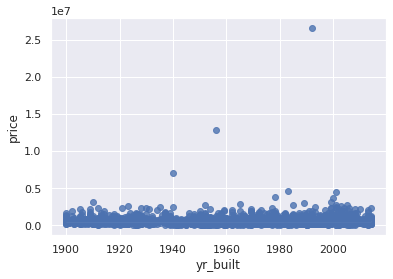

In [ ]:
# Visualización regplot, relación del precio con el año construido
sns.set(style="darkgrid")
sns.regplot(x=housedata['yr_built'], y= housedata["price"])

### Relación del precio de la vivienda con la superficie construida `sqft_living`

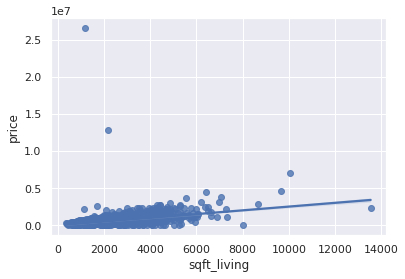

In [ ]:
# Visualización regplot, relación del precio con el año construido
sns.set(style="darkgrid")
sns.regplot(x=housedata['sqft_living'], y= housedata["price"])

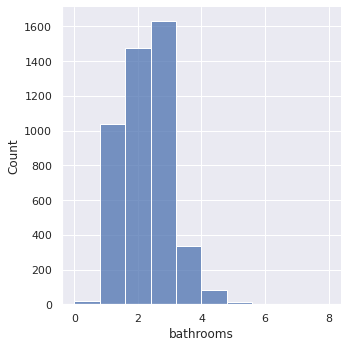

In [ ]:
# visualización displot, relación de número de viviendas según el númeo de baños
sns.displot(housedata["bathrooms"],bins=10)

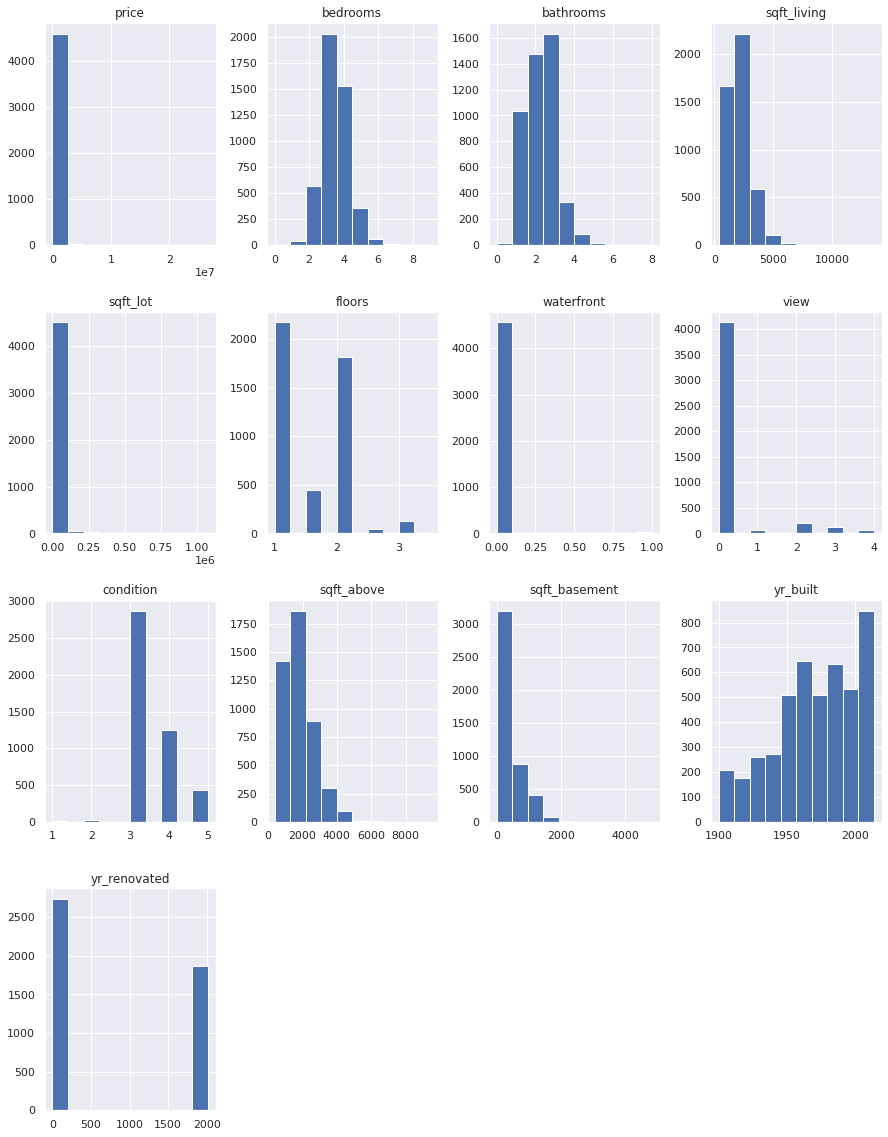

In [ ]:
# visualización histogramas
housedata.hist(figsize=(15,20))
plt.show()

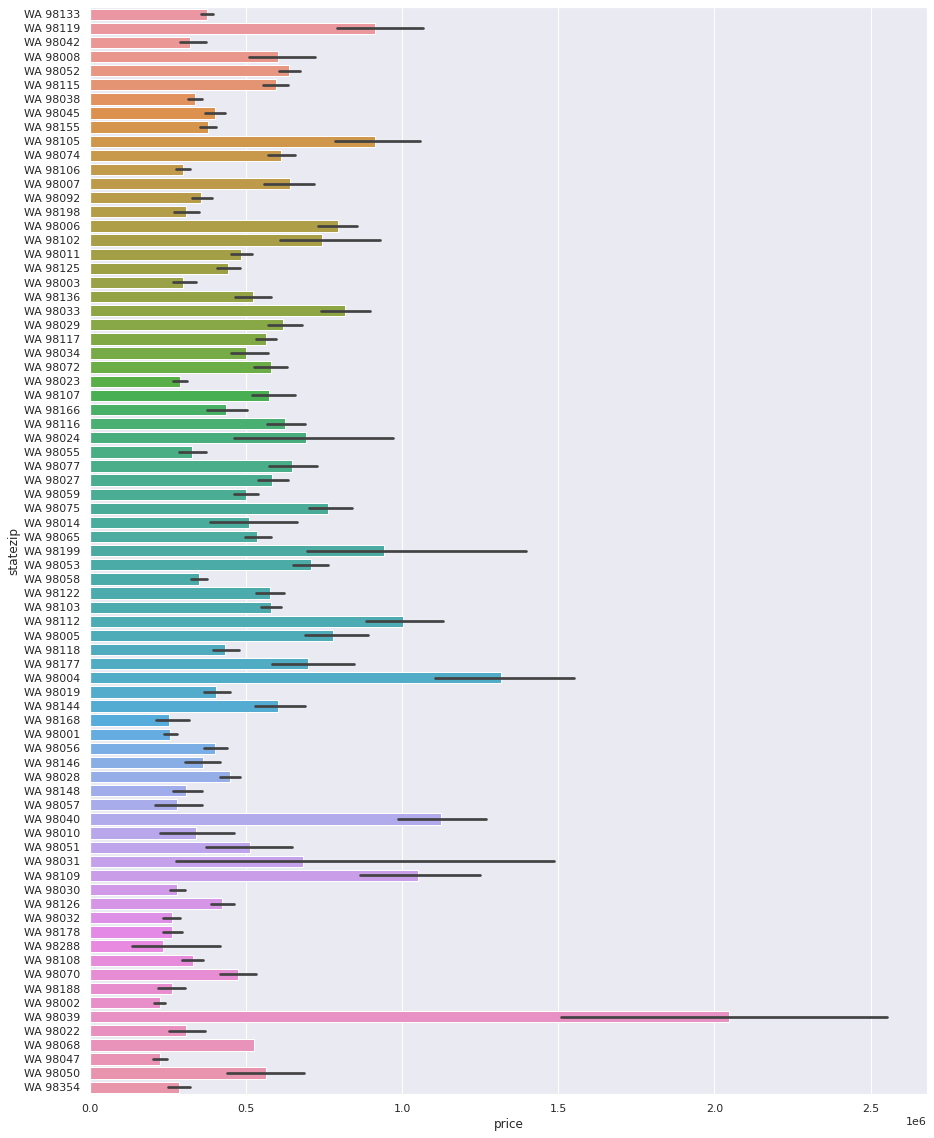

In [ ]:
# visualización barras
plt.figure(figsize=(15,20))
sns.barplot(data=housedata,y='statezip',x='price',orient="h3")

La variable objetivo es el precio de la vivienda.
[1] Los factores significativos de las variables categóricas es el statezip, ya que hay variaciones considerables de precio según el lugar, tal y como se pudede ver en el gráfico anterior y como suele ocurrir en la vida real.
Los factores significativos de las variables numéricas son los relacionados con la superficie, como se puede ver en el gráfico de precio/superficie. Habría que verificar si existe correlaci´dependencia entre las variables de superficie `sqft_living` y `sqft_lot`, para eliminar sqft_lot si la hubiera.
Aparentemente por el gráfico, no hay mucha relación entre el precio de la vivienda y el año en el que fue construida, pero no descartamos la variable.

# Hipótesis para entrenar un modelo de regresión

Planteamos un modelo de **regresión múltiple** para predecir los costes médicos de una determinada póliza (`charges`).

Para ello proponemos las siuguientes hipótesis de trabajo.

- **Hipótesis 1**: entrenar el modelo sólo con las variables numéricas
    - **Hipótesis 1 (b)**: escalar el valor de `price`
- **Hipótesis 2**: usar tanto las variables numéricas como las categóricas `street`, `statezip` y `city` (mediante *one hot encodding*) para entrenar el modelo
    - **Hipótesis 2 (b)**: escalar el valor de `price`
- **Hipótesis 3**: entrenar el modelo sólo con las variables que hemos encontrado significativas en [[1]]: `statezip`
    - **Hipótesis 3 (b)**: escalar el valor de `price`
- **Hipótesis 4**: A desarrollar en un futuro, entrenaríamos un modelo reducido teniendo en cuenta sólo `statezip` y eliminar variable numérica `sqft_lot` y también `waterfront`
    - **Hipótesis 4 (b)**: escalar el valor de `price`


# Entrenamiento del modelo de regresión lineal múltiple

In [ ]:
# Esta clase nos permite reutilizar el método de entrenamiento para las distintas hipótesis 
#   y organizar la información que necesitamos de cada una de ellas

class Hypotesis:
    def __init__(self):
        self.model = None            # El modelo de regresión lineal entrenado
        self.coefficients = None     # Coeficientes de la regresión
        self.fitted_values = None    # Predicciones del modelo sobre los datos de entrenamiento
        self.test_predictions = None # Predicciones del modelo sobre los datos de test
        self.scaler = None           # Si usamos escalado, el scaler empledado
        self.mse_train = None        # Error cuadrático medio sobre los datos de entrenamienti
        self.mse_test = None         # Error cuadrático medio sobre los datos de test
        num_features = None          # Número de variables usadas para el entrenamiento
        
    def train_model(self, X, y, scaler=None):
        self.num_features = X.shape[1]
        # [Opcional] escalamos la variable objetivo
        if scaler is not None:
            self.scaler = scaler
            y_sca = scaler.fit_transform(y.to_numpy().reshape(-1, 1)).reshape(1, -1)[0]
        # Separamos el dataset en conjunto de entrenamiento y de test
        X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y.to_numpy() if scaler is None else y_sca, 
            test_size=0.2, random_state=2001
        )
        print(f"Training set. X: {X_train.shape}, y:{y_train.shape}")
        print(f"Test set. X: {X_test.shape}, y:{y_test.shape}")
        
        # Entrenamos el modelo
        self.model = LinearRegression()
        self.model.fit(X_train, y_train)
        
        # Almacenamos resultados del entrenamiento
        self.coefficients = pd.DataFrame({
            "feature": np.array(X.columns),
            "slope": self.model.coef_
        }).set_index("feature", drop=True)
        self.fitted_values = self.model.predict(X_train)
        self.test_predictions = self.model.predict(X_test)
        
        
        # Evaluamos el modelo
        self.mse_train = mean_squared_error(y_true=y_train, y_pred=self.fitted_values)
        print("TRAIN MSE:", self.mse_train)
        self.mse_test = mean_squared_error(y_true=y_test, y_pred=self.test_predictions)
        print("TEST_MSE:", self.mse_test)

In [ ]:
# Diccionario en el que almacenaremos las hipótesis que vayamos probando
my_hypotesis = dict()

## Hipótesis 1. Usar sólo las variables numéricas

In [ ]:
# borramos las columnas categóricas
categorical_columns = ["street", "statezip","city"]
housedata_hypot1 = housedata.drop(categorical_columns, axis=1)

In [ ]:
#chequeamos nuestro dataset
housedata_hypot1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
numerical_vars = housedata.columns[housedata.dtypes != "object"]
target = "price"

In [ ]:
# Preparamos el dataset para la hipótesis 1

data_hypot1 = housedata[numerical_vars]
X_hypot1 = data_hypot1.drop(target, axis=1)
y_hypot1 = data_hypot1[target]

In [ ]:
# Probamos la hipótesis
hypot1 = Hypotesis()
hypot1.train_model(X=X_hypot1, y=y_hypot1)
my_hypotesis["Hipótesis 1"] = hypot1

Training set. X: (3680, 12), y:(3680,)
Test set. X: (920, 12), y:(920,)
TRAIN MSE: 298840205875.44604
TEST_MSE: 47944320102.91745


In [ ]:
# Preparamos el dataset para la hipótesis 1

# indicamos variable objetivo
X_hypot1 = housedata_hypot1.drop('price',axis =1).values
y_hypot1 = housedata_hypot1['price'].values

In [ ]:
# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hypot1_train, X_hypot1_test, y_hypot1_train, y_hypot1_test = train_test_split(X_hypot1, y_hypot1, test_size=0.20, random_state=43) 

In [ ]:
housedata_hypot1.dtypes

price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [ ]:
#Regresión lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hypot1_train, y_hypot1_train)

LinearRegression()

#### Validáción hipótesis 1

In [ ]:
# Validación del modelo, FASE VALIDACIÓN
# regresión lineal
y_hypot1_pred=regresion_lineal.predict(X_hypot1_test)

In [ ]:
# consultar accuracy
print("Training acc >> ", regresion_lineal.score(X_hypot1_train, y_hypot1_train))
print("Testing acc >> ", regresion_lineal.score(X_hypot1_test, y_hypot1_test))


Training acc >>  0.18315591252892383
Testing acc >>  0.5231942636658485


In [ ]:
# validación cruzada, Se trata de 
# técnica de remuestreo que puede proporcionar una robusta estimación del rendimiento de un modelo de Machine Learning 
# sobre datos no vistos
from sklearn.model_selection import cross_val_score
regresion_lineal = LinearRegression()
cvscores_10 = cross_val_score(regresion_lineal, X_hypot1, y_hypot1, cv= 10)
print('cvscores',np.mean(cvscores_10))


cvscores 0.5289011116464213


In [ ]:
# Procedemos a calcular el Error Cuadrático Medio (MSE = Mean Squared Error)
from sklearn.metrics import mean_squared_error, r2_score

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot1_train)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot1_train = mean_squared_error(y_true = y_hypot1_train, y_pred = prediccion_entrenamiento) # y_pred, no y_hypot1_pred
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hypot1_train))

#calculamos el Coeficiente R2 (R2_squared = Coeficiente R2) 
r2_hypot1_train = r2_score(y_true = y_hypot1_train, y_pred = prediccion_entrenamiento) # y_pred, no y_hypot1_pred
print('Coeficiente R2 (R2) TRAIN= ' + str(r2_hypot1_train))


#predecimos los valores y para los datos usados en el entrenamiento de test
prediccion_entrenamiento = regresion_lineal.predict(X_hypot1_test)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot1_test = mean_squared_error(y_true = y_hypot1_test, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) TEST =" + str(mse_hypot1_test))

#calculamos el Coeficiente R2 (R2_squared = Coeficiente R2) 
r2_hypot1_test = r2_score(y_true = y_hypot1_test, y_pred = prediccion_entrenamiento) # y_pred, no y_hypot1_pred
print('Coeficiente R2 (R2) TRAIN= ' + str(r2_hypot1_test))


Error Cuadrático Medio (MSE) TRAIN= 292440344586.52783
Coeficiente R2 (R2) TRAIN= 0.18315591252892383
Error Cuadrático Medio (MSE) TEST =74834240836.61484
Coeficiente R2 (R2) TRAIN= 0.5231942636658485


*Es un error cuadrático medio (MSE) muy alto, ya que para ser válida la hipótesis, el error tiene que ser próximo a cero*.
El coeficiente R2 se aleja también de 1, por tanto no está bien correlacionadas las variables para cumplir con la regresión múltiple.

### Hipótesis 1b. Escalando `price`

In [ ]:
# Fijamos la variable independiente
X_hypot1_scastd = housedata_hypot1.drop("price",axis=1)
# Fijamos la variable dependiente
y_hypot1_scastd = housedata_hypot1["price"]

In [ ]:
# Escalamos la variable price para hacerla más standard
# Se elimina la media y escala a la varianza de la unidad , la puntuación standrd de una muestra x se calcula como
# z = (x- u)/s , donde u es la media de las muestras de entrenamiento y s es la desviación de las muestras de entrenamiento.
# De esta forma los valores obtenidos tendrán una media de cero y una varianza de uno.
# Existen algunas diferencias notables con respecto a la normalización.
# En primer lugar los valores obtenidos por la estandarización no están acotados en ningún rango ([0-1] por ejemplo).
# En segundo lugar, este método consigue solucionar el problema de valores atípicos u outliers que presenta la normalización

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Los algoritmos de preprocessing de sklearn están preparados para convertir matrices por lo que tenemos que hacer una transformación
# de nuestra variable y,  ya que es una variable de tipo Series
# para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) que transforma un array de 1*n 
# en una matriz de n*1

y_hypot1_scastd = scaler.fit_transform(y_hypot1_scastd.to_numpy().reshape(-1,1))
#Volvemos a transformar nuestra variable en un array de 1*n
y_hypot1_scastd=y_hypot1_scastd.reshape(1,-1)[0]

In [ ]:
# preparamos train data y test data
X_hypot1_scastd_train, X_hypot1_scastd_test, y_hypot1_scastd_train, y_hypot1_scastd_test = train_test_split(X_hypot1_scastd, y_hypot1_scastd, test_size=0.20, random_state=43) 

In [ ]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hypot1_scastd_train, y_hypot1_scastd_train)

LinearRegression()

### Validación hipótesis 1b

In [ ]:
# Probamos la hipótesis con los mismos datos

# hypot1_scastd = Hypotesis()
# hypot1_scastd.train_model(X=X_hypot1, y=y_hypot1, scaler=MinMaxScaler())
# my_hypotesis["Hipótesis 1b"] = hypot1_scastd

In [ ]:
# FASE VALIDACIÓN

#predecimos los valores y par los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot1_scastd_train)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot1_scastd_train = mean_squared_error(y_true = y_hypot1_scastd_train, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) HIPO_1_TRAIN =" + str(mse_hypot1_train))
print("Error Cuadrático Medio (MSE) HIPO_1b_TRAIN =" + str(mse_hypot1_scastd_train))

#calculamos el Coeficiente R2 (R2_squared = Coeficiente R2) 
r2_hypot1_scastd_train = r2_score(y_true = y_hypot1_scastd_train, y_pred = prediccion_entrenamiento) # y_pred, no y_hypot1_pred
print('Coeficiente R2 (R2) HIPO_1b_TRAIN= ' + str(r2_hypot1_scastd_train))

#predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot1_scastd_test)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot1_scastd_test = mean_squared_error(y_true = y_hypot1_scastd_test, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) HIPO_1_TEST =" + str(mse_hypot1_test))
print("Error Cuadrático Medio (MSE) HIPO_1b_TEST =" + str(mse_hypot1_scastd_test))

#calculamos el Coeficiente R2 (R2_squared = Coeficiente R2) 
r2_hypot1_scastd_test = r2_score(y_true = y_hypot1_scastd_test, y_pred = prediccion_entrenamiento) # y_pred, no y_hypot1_pred
print('Coeficiente R2 (R2) HIPO_1b_TEST= ' + str(r2_hypot1_scastd_test))

Error Cuadrático Medio (MSE) HIPO_1_TRAIN =292440344586.52783
Error Cuadrático Medio (MSE) HIPO_1b_TRAIN =0.9200853158776038
Coeficiente R2 (R2) HIPO_1b_TRAIN= 0.1831559125289236
Error Cuadrático Medio (MSE) HIPO_1_TEST =74834240836.61484
Error Cuadrático Medio (MSE) HIPO_1b_TEST =0.23544592048663046
Coeficiente R2 (R2) HIPO_1b_TEST= 0.5231942636659523


Al escalar la variable objetivo obtenemos una mejora considerable aproximándonos a 0. 

Al escalar de manera standard la variable, se elimina la media y escala a la varianza de la unidad , la puntuación standrd de una muestra x se calcula como
z = (x- u)/s , donde u es la media de las muestras de entrenamiento y s es la desviación de las muestras de entrenamiento.
De esta forma los valores obtenidos tendrán una media de cero y una varianza de uno.
Existen algunas diferencias notables con respecto a la normalización.
- En primer lugar los valores obtenidos por la estandarización no están acotados en ningún rango ([0-1] por ejemplo).
- En segundo lugar, este método consigue solucionar el problema de valores atípicos u outliers que presenta la normalización
Escogemos la opción de escalado standard (StandardScaer) frente al escalado normalizado(MinMaxScaler).

El Coeficiente R2 cuadrado se ha alejado de 1, también en la variable escalada.

## Hipótesis 2. Entrenar el modelo trasformando en numéricas las variables categóricas `street`, `statezip`,`city`

In [ ]:
# verificamos el contenido de las colmumnas, ya que no debe aparecer los campos 'date' y 'country'
housedata.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip'],
      dtype='object')

In [ ]:
#Preparamos el dataset de la hipótesis 2
housedata_hypot2 = pd.get_dummies(data = housedata, prefix = "OHE", prefix_sep = "_", 
                                       columns = categorical_columns,
                                       drop_first = True,
                                       dtype = "int8")

#la función get_dummies convierte variable categóricas en indicador 1, 0 , con la metodología one hot encoding (OHE)

In [ ]:
housedata_hypot2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,OHE_SeaTac,OHE_Seattle,OHE_Shoreline,OHE_Skykomish,OHE_Snoqualmie,OHE_Snoqualmie Pass,OHE_Tukwila,OHE_Vashon,OHE_Woodinville,OHE_Yarrow Point
0,313000,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2384000,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,342000,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Preparamos el dataset para la hipótesis 2

# Fijamos la variable independiente
X_hypot2 = housedata_hypot2.drop("price",axis=1)
# Fijamos la variable dependiente
y_hypot2 = housedata_hypot2["price"]

print("X shape", X_hypot2.shape)
print("y shape", y_hypot2.shape)

X shape (4600, 4655)
y shape (4600,)


In [ ]:
housedata_hypot2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       ...
       'OHE_SeaTac', 'OHE_Seattle', 'OHE_Shoreline', 'OHE_Skykomish',
       'OHE_Snoqualmie', 'OHE_Snoqualmie Pass', 'OHE_Tukwila', 'OHE_Vashon',
       'OHE_Woodinville', 'OHE_Yarrow Point'],
      dtype='object', length=4656)

In [ ]:
# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hypot2_train, X_hypot2_test, y_hypot2_train, y_hypot2_test = train_test_split(X_hypot2, y_hypot2, test_size=0.20, random_state=43) 

In [ ]:
housedata_hypot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 4656 entries, price to OHE_Yarrow Point
dtypes: float64(3), int64(10), int8(4643)
memory usage: 20.8 MB


In [ ]:
 #Regresión lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hypot2_train, y_hypot2_train) 

LinearRegression()

### Validación hipótesis 2

In [ ]:
# FASE VALIDACIÓN

#predecimos los valores y par los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot2_train)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot2_train = mean_squared_error(y_true = y_hypot2_train, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) HIPO_1_TRAIN =" + str(mse_hypot1_train))
print("Error Cuadrático Medio (MSE) HIPO_2_TRAIN =" + str(mse_hypot2_train))

#calculamos el Coeficiente R2 (R2_squared = Coeficiente R2) 
r2_hypot2_train = r2_score(y_true = y_hypot2_train, y_pred = prediccion_entrenamiento) # y_pred, no y_hypot1_pred
print('Coeficiente R2 (R2) HIPO_2_TRAIN= ' + str(r2_hypot2_train))

#predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot2_test)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot2_test = mean_squared_error(y_true = y_hypot2_test, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) HIPO_1_TEST =" + str(mse_hypot1_test))
print("Error Cuadrático Medio (MSE) HIPO_2_TEST =" + str(mse_hypot2_test))

#calculamos el Coeficiente R2 (R2_squared = Coeficiente R2) 
r2_hypot2_test = r2_score(y_true = y_hypot2_test, y_pred = prediccion_entrenamiento) 
print('Coeficiente R2 (R2) HIPO_2_TEST= ' + str(r2_hypot2_test))

Error Cuadrático Medio (MSE) HIPO_1_TRAIN =292440344586.52783
Error Cuadrático Medio (MSE) HIPO_2_TRAIN =296832108.93929946
Coeficiente R2 (R2) HIPO_2_TRAIN= 0.9991708888405891
Error Cuadrático Medio (MSE) HIPO_1_TEST =74834240836.61484
Error Cuadrático Medio (MSE) HIPO_2_TEST =17522262691131.45
Coeficiente R2 (R2) HIPO_2_TEST= -110.64294942105663


### Hipótesis 2b. Escalando `price`

In [ ]:
# Fijamos la variable independiente
X_hypot2_scastd = housedata_hypot2.drop("price",axis=1)
# Fijamos la variable dependiente
y_hypot2_scastd = housedata_hypot2["price"]

In [ ]:
# Escalamos la variable price para hacerla standard

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Ver escalado hipótesis 1b

y_hypot2_scastd = scaler.fit_transform(y_hypot2_scastd.to_numpy().reshape(-1,1))
#Volvemos a transformar nuestra variable en un array de 1*n
y_hypot2_scastd=y_hypot2_scastd.reshape(1,-1)[0]

In [ ]:
# preparamos train data y test data
X_hypot2_scastd_train, X_hypot2_scastd_test, y_hypot2_scastd_train, y_hypot2_scastd_test = train_test_split(X_hypot2_scastd, y_hypot2_scastd, test_size=0.20, random_state=43) 

In [ ]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hypot2_scastd_train, y_hypot2_scastd_train)

LinearRegression()

In [ ]:
# FASE VALIDACIÓN

#predecimos los valores y par los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot2_scastd_train)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot2_scastd_train = mean_squared_error(y_true = y_hypot2_scastd_train, y_pred = prediccion_entrenamiento)

print("Error Cuadrático Medio (MSE) HIPO_2b_TRAIN =" + str(mse_hypot2_scastd_train))

#predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot2_scastd_test)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot2_scastd_test = mean_squared_error(y_true = y_hypot2_scastd_test, y_pred = prediccion_entrenamiento)

print("Error Cuadrático Medio (MSE) HIPO_2b_TEST =" + str(mse_hypot2_scastd_test))

Error Cuadrático Medio (MSE) HIPO_2b_TRAIN =0.0009339028276080501
Error Cuadrático Medio (MSE) HIPO_2b_TEST =55.12911231812093


Al escalar la variable, sale un error menor que sin escalar.
Sin embargo, al incluir las variables categóricas `city`, `street` y `statezip` empeora el error MSE con respecto a sino las incluimos. Esto querrá decir un exceso de variables o variables independientes que dependen entre ellas. Por tanto , probaremos la hipótesis de sólo incluir `statezip` y nos deshacemos del resto de variables categóricas.

## Hipótesis 3. Entrenar el modelo sólo con la variable categórica `statezip`

In [ ]:
# verificamos el contenido de las colmumnas, ya que no debe aparecer los campos 'date' y 'country'
housedata.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip'],
      dtype='object')

In [ ]:
categorical_columns = ["statezip"]

In [ ]:
#Preparamos el dataset de la hipótesis 3
categorical_columns = ["statezip"]
housedata_hypot3 = pd.get_dummies(data = housedata, prefix = "OHE", prefix_sep = "_", 
                                       columns = categorical_columns,
                                       drop_first = True,
                                       dtype = "int8")
housedata_hypot3 = housedata_hypot3.drop("street", axis=1)
housedata_hypot3 = housedata_hypot3.drop("city", axis=1)
#la función get_dummies convierte variable categóricas en indicador 1, 0 , con la metodología one hot encoding (OHE

In [ ]:
# verificamos el contenido de las colmumnas, ya que no debe aparecer los campos 'date' y 'country'
housedata_hypot3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'OHE_WA 98002', 'OHE_WA 98003',
       'OHE_WA 98004', 'OHE_WA 98005', 'OHE_WA 98006', 'OHE_WA 98007',
       'OHE_WA 98008', 'OHE_WA 98010', 'OHE_WA 98011', 'OHE_WA 98014',
       'OHE_WA 98019', 'OHE_WA 98022', 'OHE_WA 98023', 'OHE_WA 98024',
       'OHE_WA 98027', 'OHE_WA 98028', 'OHE_WA 98029', 'OHE_WA 98030',
       'OHE_WA 98031', 'OHE_WA 98032', 'OHE_WA 98033', 'OHE_WA 98034',
       'OHE_WA 98038', 'OHE_WA 98039', 'OHE_WA 98040', 'OHE_WA 98042',
       'OHE_WA 98045', 'OHE_WA 98047', 'OHE_WA 98050', 'OHE_WA 98051',
       'OHE_WA 98052', 'OHE_WA 98053', 'OHE_WA 98055', 'OHE_WA 98056',
       'OHE_WA 98057', 'OHE_WA 98058', 'OHE_WA 98059', 'OHE_WA 98065',
       'OHE_WA 98068', 'OHE_WA 98070', 'OHE_WA 98072', 'OHE_WA 98074',
       'OHE_WA 98075', 'OHE_WA 98077', 'OHE_WA 98092', 'OHE_WA 98102',
 

In [ ]:
# Preparamos el dataset para la hipótesis 3

# Fijamos la variable independiente
X_hypot3 = housedata_hypot3.drop("price",axis=1)
# Fijamos la variable dependiente
y_hypot3 = housedata_hypot3["price"]

print("X shape", X_hypot3.shape)
print("y shape", y_hypot3.shape)

X shape (4600, 88)
y shape (4600,)


In [ ]:
# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hypot3_train, X_hypot3_test, y_hypot3_train, y_hypot3_test = train_test_split(X_hypot3, y_hypot3, test_size=0.20, random_state=43) 

In [ ]:
#Regresión lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hypot3_train, y_hypot3_train) 

LinearRegression()

### Validación hipótesis 3

In [ ]:
# FASE VALIDACIÓN

#predecimos los valores y par los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot3_train)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot3_train = mean_squared_error(y_true = y_hypot3_train, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) HIPO_1_TRAIN =" + str(mse_hypot1_train))
print("Error Cuadrático Medio (MSE) HIPO_2_TRAIN =" + str(mse_hypot2_train))
print("Error Cuadrático Medio (MSE) HIPO_3_TRAIN =" + str(mse_hypot3_train))

#calculamos el Coeficiente R2 (R2_squared = Coeficiente R2) 
r2_hypot3_train = r2_score(y_true = y_hypot2_train, y_pred = prediccion_entrenamiento) # y_pred, no y_hypot1_pred
print('Coeficiente R2 (R2) HIPO_3_TRAIN= ' + str(r2_hypot3_train))

#predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot3_test)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot3_test = mean_squared_error(y_true = y_hypot3_test, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) HIPO_1_TEST =" + str(mse_hypot1_test))
print("Error Cuadrático Medio (MSE) HIPO_2_TEST =" + str(mse_hypot2_test))
print("Error Cuadrático Medio (MSE) HIPO_3_TEST =" + str(mse_hypot3_test))

#calculamos el Coeficiente R2 (R2_squared = Coeficiente R2) 
r2_hypot3_test = r2_score(y_true = y_hypot3_test, y_pred = prediccion_entrenamiento) 
print('Coeficiente R2 (R2) HIPO_3_TEST= ' + str(r2_hypot3_test))

Error Cuadrático Medio (MSE) HIPO_1_TRAIN =292440344586.52783
Error Cuadrático Medio (MSE) HIPO_2_TRAIN =296832108.93929946
Error Cuadrático Medio (MSE) HIPO_3_TRAIN =263668377732.80823
Coeficiente R2 (R2) HIPO_3_TRAIN= 0.263521742498806
Error Cuadrático Medio (MSE) HIPO_1_TEST =74834240836.61484
Error Cuadrático Medio (MSE) HIPO_2_TEST =17522262691131.45
Error Cuadrático Medio (MSE) HIPO_3_TEST =52423257687.320885
Coeficiente R2 (R2) HIPO_3_TEST= 0.6659856543849896


Error cuadrático muy grande, mejora respecto a la hipótesis 2, por la reducción de variables.
El coeficiente de R2 de la hipótesis 3, empeora respecto a la hipótesis 2.

### Hipótesis 3b. Escalando `price`

In [ ]:
# Probamos la hipótesis con los mismos datos

# Fijamos la variable independiente
X_hypot3_scastd = housedata_hypot3.drop("price",axis=1)
# Fijamos la variable dependiente
y_hypot3_scastd = housedata_hypot3["price"]



In [ ]:
# Escalamos la variable price para hacerla standard

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Ver escalado hipótesis 1b

y_hypot3_scastd = scaler.fit_transform(y_hypot3_scastd.to_numpy().reshape(-1,1))
#Volvemos a transformar nuestra variable en un array de 1*n
y_hypot3_scastd=y_hypot3_scastd.reshape(1,-1)[0]


In [ ]:
# preparamos train data y test data
X_hypot3_scastd_train, X_hypot3_scastd_test, y_hypot3_scastd_train, y_hypot3_scastd_test = train_test_split(X_hypot3_scastd, y_hypot3_scastd, test_size=0.20, random_state=43) 

In [ ]:
#Regresión lineal
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hypot3_train, y_hypot3_train) 

In [ ]:
# FASE VALIDACIÓN

#predecimos los valores y par los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot3_scastd_train)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot3_scastd_train = mean_squared_error(y_true = y_hypot3_scastd_train, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) HIPO_1_TRAIN =" + str(mse_hypot1_train))
print("Error Cuadrático Medio (MSE) HIPO_1b_TRAIN =" + str(mse_hypot1_scastd_train))
print("Error Cuadrático Medio (MSE) HIPO_2_TRAIN =" + str(mse_hypot2_train))
print("Error Cuadrático Medio (MSE) HIPO_2b_TRAIN =" + str(mse_hypot2_scastd_train))
print("Error Cuadrático Medio (MSE) HIPO_3_TRAIN =" + str(mse_hypot3_train))
print("Error Cuadrático Medio (MSE) HIPO_3b_TRAIN =" + str(mse_hypot3_scastd_train))

#predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hypot3_scastd_test)

#calculamos el Error Cuadrático Medio (MSE = Mean Squared Error) 
mse_hypot3_scastd_test = mean_squared_error(y_true = y_hypot3_scastd_test, y_pred = prediccion_entrenamiento)
print("Error Cuadrático Medio (MSE) HIPO_1_TEST =" + str(mse_hypot1_test))
print("Error Cuadrático Medio (MSE) HIPO_1b_TEST =" + str(mse_hypot1_scastd_test))
print("Error Cuadrático Medio (MSE) HIPO_2_TEST =" + str(mse_hypot2_test))
print("Error Cuadrático Medio (MSE) HIPO_2b_TEST =" + str(mse_hypot2_scastd_test))
print("Error Cuadrático Medio (MSE) HIPO_3_TEST =" + str(mse_hypot3_test))
print("Error Cuadrático Medio (MSE) HIPO_3b_TEST =" + str(mse_hypot3_scastd_test))

In [ ]:
# hypot3_scastd = Hypotesis()
# hypot3_scastd.train_model(X=X_hypot3_scastd, y=y_hypot3_scastd, scaler=StandardScaler())
# my_hypotesis["Hipótesis 3b"] = hypot3_scastd

# Evaluar los distintos modelos de regresión entrenados

In [ ]:
# Resumen de los determinados errores obtenidos

name_list = np.array(my_hypotesis.keys())
mse_train_list = np.array([h.mse_train for h in my_hypotesis.values()])
mse_test_list = np.array([h.mse_test for h in my_hypotesis.values()])

errors = pd.DataFrame(
 {"name": name_list, "mse_train": mse_train_list, "mse_test":mse_test_list}   
)


In [ ]:
# Visualización de los distintos errores

fif, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))

plt_train = axes[0]
plt_train.set_title("Train MSE")

plt_test = axes[1]
plt_test.set_title("Test MSE")

sns.barplot(
    ax=plt_train, 
    data=errors.nsmallest(len(errors), "mse_train"),
    y="name", x="mse_train",
    palette=["lightgreen"] + ["lightgrey"]*(len(errors) - 1),
).set(xlabel="", ylabel="")

plt_train.bar_label(plt_train.containers[0],fmt='%.3f', label_type='center')

sns.barplot(
    ax=plt_test, 
    data=errors.nsmallest(len(errors), "mse_test"),
    y="name", x="mse_test",
    palette=["lightgreen"] + ["lightgrey"]*(len(errors) - 1)
).set(xlabel="", ylabel="")
plt_test.bar_label(plt_train.containers[0],fmt='%.3f', label_type='center')
   

plt_train.set_xscale("log")
plt_test.set_xscale("log")

fig.tight_layout(pad=10.0)

<div class="alert alert-success">
    La Hipótesis 2b es la mejor, formulada como:
    <blockquote>
        Usar todas las variables proporcionadas, codificando las variables categóricas mediante la técnica <em>One Hot Encoding</em> y escalando la variable objetivo (<em>price</em>).
        
    </blockquote>
</div>

# Conclusiones

En este ejercicio hemos formulado varias hipótesis de entrenamiento para un modelo de regresión que nos permita predecir el precio de una vivienda.

Para formular dichas hipótesis se ha realiado un análisis del dataset disponible si se ha asumido lo siguiente:

1. Los precios dependen en gran medida de la superficie de la vivienda
1. Se debe estudiar más a fondo la localización de la vivienda

Además nos hemos planteado las siguientes preguntas:

- ¿Mejora la predicción si escalamos la variable objetivo?
- ¿Qué es mejor, entrenar con todas las variables o eliminar aquellas que parecen poco representativas?

Tras lo anterior se han formulado 6 hipótesis que nos permiten dar respuesta estas preguntas y confirmar o no las afirmaciones que dábamos como ciertas tras analizar el dataset.

Se han entrenado 6 modelos de regresión según cada una de las hipótesis planteadas.

Tras entrenar estos modelos se ha comparado cuál es más preciso usando el *error cuadrático medio (MSE)*, con lo que hemos podido seleccionar una hipótesis como la mejor.


Según el cálculo del error cuadrático medio **los modelos han sido significativamente más precisos al escalar la variable objetivo**.

In [ ]:
hypot2 = Hypotesis()
hypot2.train_model(X=X_hypot2, y=y_hypot2)
my_hypotesis["Hipótesis 2"] = hypot2

In [ ]:
# ¿Són más precisos los modelos que incluyen más variables en el entrenamiento?

#best_models = [(n, h.num_features, h.mse_test) for n,h in my_hypotesis.items() if n.endswith("b") ]
#df = (
#    pd.DataFrame(best_models, columns=["Hypotesis", "num_features", "mse_test"])
#    .set_index("Hypotesis", drop=True)
#    .sort_values("mse_test", ascending=False)
#)

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
#axes[0].set_title("Comparación MSE")
#axes[1].set_title("Comparación num. variables de entrenamiento")


#df[["mse_test"]].plot(kind="barh", ax=axes[0], color="darkgrey")
#df[["num_features"]].plot(kind="barh", ax=axes[1], color="darkgrey")

#for ax in axes:
#    ax.set_ylabel("")

#plt.tight_layout(pad=5.0)

A la vista de los gráficos anteriores y del error cuadrático medio parece que **es más importante elegir bien las variables de entrenamiento**.

Por una parte podemos observar que en la *Hipótesis 2b* hemos entrenado un modelo con más  variables que en la *Hipótesis 1b* no obstante la precisión del model ha sido considerablemente peor, quizás por un exceso de variables en el modelo que dependían entre ellas (como statezip y city).

Error Cuadrático Medio (MSE) HIPO_1_TRAIN =292440344586.52783

Error Cuadrático Medio (MSE) HIPO_1b_TRAIN =0.9200853158776038

Coeficiente R2 (R2) HIPO_1_TRAIN= 0.18315591252892383


Error Cuadrático Medio (MSE) HIPO_2_TRAIN =296832108.93929946

Error Cuadrático Medio (MSE) HIPO_2b_TRAIN =0.0009339028276080501

Coeficiente R2 (R2) HIPO_2_TRAIN= 0.9991708888405891

Error Cuadrático Medio (MSE) HIPO_3_TRAIN =263668377732.80823

Error Cuadrático Medio (MSE) HIPO_3b_TRAIN =402537236305.6149

Coeficiente R2 (R2) HIPO_3_TRAIN= 0.263521742498806

Error Cuadrático Medio (MSE) HIPO_1_TEST =74834240836.61484

Error Cuadrático Medio (MSE) HIPO_1b_TEST =0.23544592048663046

Error Cuadrático Medio (MSE) HIPO_2_TEST =17522262691131.45

Error Cuadrático Medio (MSE) HIPO_2b_TEST =55.12911231812093

Error Cuadrático Medio (MSE) HIPO_3_TEST =52423257687.320885

Error Cuadrático Medio (MSE) HIPO_3b_TEST =384029249464.58014

Coeficiente R2 (R2) HIPO_3_TEST= 0.6659856543849896

La hipótesis con menor error cuadrático medio, en el test, ha sido la **hipótesis 2.b** de usar todas las variables numéricas trasformando las variabls categódicas en numéricaicas con el OHE, y escalando de manera standard la variable precio. Mientras que la **hipótesis 1.b**, sólo las variables numéricas ha salido mejor el error cuadrático medio en el test.

**¿Cuáles son las variables más significativas?**

Para determinar qué variables han sido más significativas en cada uno de los experimentos, vamos a fijarnos en los coeficientes de la regresión. 

Por ejemplo, para la *Hipótesis 2b* los coeficientes han sido los siguientes:

In [ ]:
#coef_h2 = X_hypot2_scastd.coefficients.copy()

#def calculate_price_increment(x):
#    price = X_hypot2_scastd.scaler.inverse_transform(np.array(x).reshape(-1,1)).reshape(1,-1)[0][0]
#    if x < 0:
#        price *= -1
#    return f"{price:.2f}"
#    
#coef_h2['price_increment'] = coef_h2.slope.apply(calculate_price_increment)
#coef_h2.transpose()

In [ ]:
# ¿Quáles han sido las variables más significativas en cada uno de los experimentos?

#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))

#coef_list = [(n,h.coefficients, h.mse_test) for n,h in my_hypotesis.items() if n.endswith("b")]
#coef_list = sorted(coef_list, key=lambda x: x[2])

#for i, t in enumerate(coef_list):
#    name, coef, mse_test = t
#    color = "seagreen" if i==0 else "steelblue"
#    ax = axes[math.floor(i/2)][i%2]
#    ax.set_title(f"{name} MSE: {mse_test:.4f}")
#    coef = coef.sort_values("slope", ascending=True)
#    coef.plot(kind="barh", ax=ax, color=color)
    
#fig.tight_layout(pad=2.5)